# Test Keras

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [9]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 7.5

In [4]:
import cPickle
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam

from sklearn.metrics import mean_squared_error

Using Theano backend.


In [11]:
tau=2*np.pi

#  Generating data
## Generate X by uniformly sampling the interval [0,tau) 500 times
## Generate targets Y by 3 * sin(x) + 1 + e for error e
## error e defined by e ~ N(0,0.5) (drawn from normal with mean 0, std deviation 0.5

np.random.seed(29)
N = 1000
X = np.random.random((N,1))*tau
Y = np.sin(X)*3+1+np.random.normal(0,0.5,(N,1))

#plt.show()

#  Splitting Data
I = np.arange(N)
np.random.shuffle(I)
n = 800

## Training sets
xtr = X[I][:n]
ttr = Y[I][:n]
## Testing sets
xte = X[I][n:]
tte = Y[I][n:]

# Multilayer Perceptron
model = Sequential()    # Feedforward
model.add(Dense(100, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(100))
model.add(Activation('tanh'))
model.add(Dense(1))
model.compile('adam', 'mse')

#save data for keras_learner.py (to see verbose output, as it is not possible on jupyter due to the lock bug)
cPickle.dump((xtr, ttr, model), open("./Learning/tmp/cur_learning_model.pkl", "w"))
print "done"

done


In [12]:
hist, model = cPickle.load(open("./Learning/tmp/cur_trained_model.pkl"))
print hist.history.keys()
print len(hist.history["val_loss"])

['loss', 'val_loss']
250


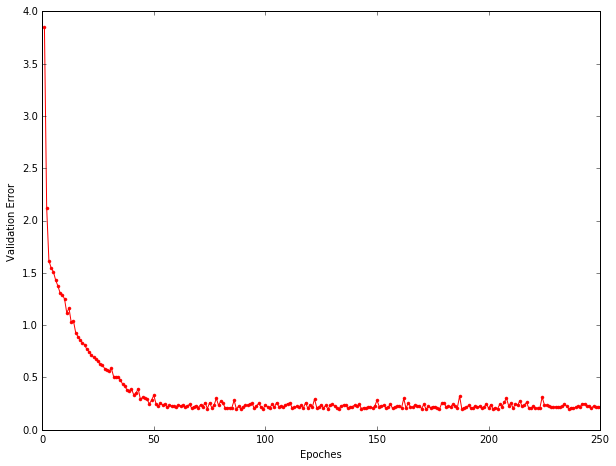

('error:', 0.26296985030007242)


In [13]:
val_los = hist.history["val_loss"]
fig = plt.plot(range(1, len(val_los) + 1), val_los, 'r.-')
plt.xlabel("Epoches")
plt.ylabel("Validation Error")
plt.show()

pred = model.predict(xte)
print("error:", mean_squared_error(tte, pred))

In [24]:
print model.get_weights()
print len(model.get_weights())
print model.get_weights()[2]
print model.get_weights()[2].shape
print model.get_weights()[3].shape
# so layers must works as np.dot(input * weights) + bias, first weights, bias

[array([[-1.39355385, -0.79063207]], dtype=float32), array([ 0.96878815,  1.86432481], dtype=float32), array([[-0.61187458,  1.30413711, -0.30249473],
       [ 1.65686154, -0.53619814,  1.35597134]], dtype=float32), array([ 0.19360791,  0.47815716,  0.39630628], dtype=float32), array([[ 1.86216724],
       [-1.7123214 ],
       [ 1.0321703 ]], dtype=float32), array([ 0.14452493], dtype=float32)]
6
[[-0.61187458  1.30413711 -0.30249473]
 [ 1.65686154 -0.53619814  1.35597134]]
(2L, 3L)
(3L,)


In [30]:
print hist.history.keys()

['loss', 'val_loss']


In [33]:
print len(hist.history["val_loss"])

250
